In [1]:
import numpy as np
# import sympy as symb
# from sympy import sin,cos
# from scipy.optimize import fsolve, root
import matplotlib.pyplot as plt
import copy

In [2]:
def gs(k=2,N=64):
    # k=4
    # N=64 # 64 grids 65 points

    iter_num = 1000
    phi = np.zeros([iter_num,N+1]) # points #
    residual = np.zeros([iter_num,N+1])
    residual_max = np.zeros([iter_num])
    # print(phi[0,64])
    delta = 1./(N)
    x_series = np.linspace(0,1,N+1)
    # (x_series[1] - x_series[0])*65
    for t in range(0,iter_num-1): # iter # t
        for j in range(1,N):
            phi[t+1,j]=0.5*( phi[t,j+1] + phi[t+1,j-1] - delta**2*np.sin(k*np.pi*j*delta) )
        # add max residual max every iter #
        for j in range(1,N):
            residual[t+1,j] = np.sin(k*np.pi*j*delta) - (phi[t+1,j+1]-2*phi[t+1,j]+phi[t+1,j-1])/delta**2
        # find max residual
        residual_max[t+1]  = max( abs(residual[t+1,:]) )
    # phi[990,:]
    
    return residual_max


In [3]:
all_residual      = {}
all_residual['1'] = gs(k=1, N=64)
all_residual['2'] = gs(k=2, N=64)
all_residual['4'] = gs(k=4, N=64)
all_residual['8'] = gs(k=8, N=64)
all_residual['16'] = gs(k=16, N=64)

/HGST_SATA_8T_3/yycheng/miniconda3/envs/from_WSL/lib/python3.7/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Unrecognized location 'lowerleft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


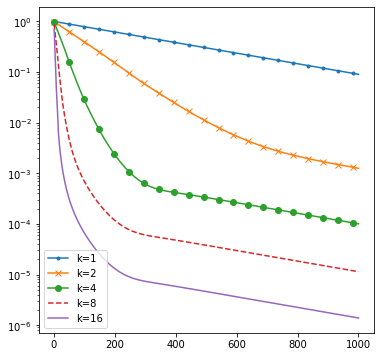

In [4]:
# plot center of domain
# series = u[0:ind_err,int((ny-1)/2),int((nz-1)/2)]
iter_num = 1000
# import matplotlib.ticker as tck
fig,ax = plt.subplots(1,1,figsize=(6,6))
# custom_xlim = (0, np.p)
# custom_ylim = (0, 5.5)
# Setting the values for all axes.

# plt.setp(ax, xlim=custom_xlim, ylim=custom_ylim)
# ax.set_xscale('log')
stride = max( int(len(all_residual['1'][1:]) / 20), 1)
ax0=ax.plot(np.linspace(1,iter_num,iter_num-1), all_residual['1'][1:],'.-', label='k=1',markevery=stride)
ax0=ax.plot(np.linspace(1,iter_num,iter_num-1), all_residual['2'][1:],'x-', label='k=2',markevery=stride)
ax0=ax.plot(np.linspace(1,iter_num,iter_num-1), all_residual['4'][1:],'o-', label='k=4',markevery=stride)
ax0=ax.plot(np.linspace(1,iter_num,iter_num-1), all_residual['8'][1:],'--', label='k=8')
ax0=ax.plot(np.linspace(1,iter_num,iter_num-1), all_residual['16'][1:],'-', label='k=16')
# ax0=ax.plot(np.linspace(0,ind_err-1,ind_err-2), abs(series[0:-2] - series[1:-1]),'--g', label='')
ax.set_yscale("log")
# ax.grid()
ax.legend(loc='lowerleft')
# ax.set_title('center of domain:(y,z)=(0,0.5)')
# ax[1].set_yscale("log")

In [12]:
def gb(N=64):
    # k=4
    # N=64 # 64 grids 65 points

    iter_num = 1000
    phi = np.zeros([iter_num,N+1]) # points #
    residual = np.zeros([iter_num,N+1])
    residual_max = np.zeros([iter_num])
    # print(phi[0,64])
    delta = 1./(N)
    x_series = np.linspace(0,1,N+1)
    # (x_series[1] - x_series[0])*65
    for t in range(0,iter_num-1): # iter # t
        for j in range(1,N):
            # phi[t+1,j]=0.5*( phi[t,j+1] + phi[t+1,j-1] - delta**2*np.sin(k*np.pi*j*delta) )
            phi[t+1,j] = 0.5*(phi[t,j+1] + phi[t+1,j-1]) - 0.25*delta**2*((np.sin(np.pi*j*delta)+np.sin(16*np.pi*j*delta)))
        # add max residual max every iter #
        for j in range(1,N):
            residual[t+1,j] = 0.5*(np.sin(np.pi*j*delta)+np.sin(np.pi*16*j*delta) ) - (phi[t+1,j+1]-2*phi[t+1,j]+phi[t+1,j-1])/delta**2
        # find max residual
        residual_max[t+1]  = max( abs(residual[t+1,:]) )
    # phi[990,:]
    
    return [residual,residual_max]

In [13]:
[residual_b,residual_max_b] = gb(N=64)
residual_b.shape

(1000, 65)

In [16]:
max(abs(residual_b[10]))

0.4966875729119046

/HGST_SATA_8T_3/yycheng/miniconda3/envs/from_WSL/lib/python3.7/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Unrecognized location 'lowerleft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


Text(0.5, 1.0, 'residual by number of iterations')

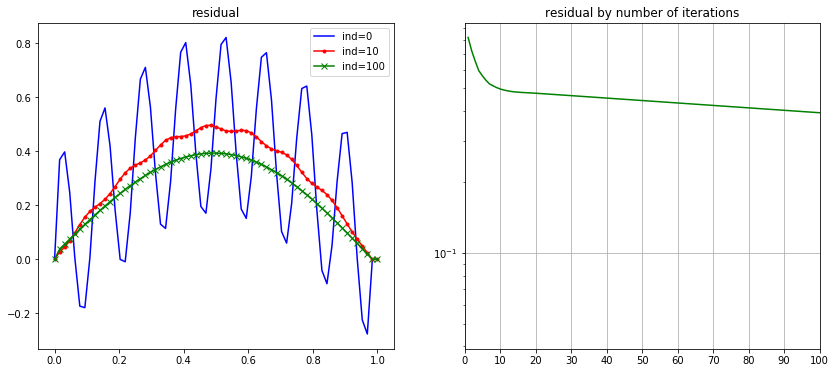

In [15]:
# plot center of domain
# series = u[0:ind_err,int((ny-1)/2),int((nz-1)/2)]

# import matplotlib.ticker as tck
fig,ax = plt.subplots(1,2,figsize=(14,6))
# custom_xlim = (0, np.p)
# custom_ylim = (0, 5.5)
# Setting the values for all axes.

# plt.setp(ax, xlim=custom_xlim, ylim=custom_ylim)
# ax.set_xscale('log')
# stride = max( int(len(all_residual['1'][1:]) / 20), 1)
ax0=ax[0].plot(np.linspace(0,1,65), residual_b[1,:],'-b', label='ind=0')
ax0=ax[0].plot(np.linspace(0,1,65), residual_b[10,:],'.-r', label='ind=10')
ax0=ax[0].plot(np.linspace(0,1,65), residual_b[100,:],'x-g', label='ind=100')
ax1=ax[1].plot(np.linspace(1,iter_num,iter_num-2), residual_max_b[1:-1],'-g', label='k=1')
ax[1].set_yscale("log")
ax[1].set_xlim([0,100])
ax[1].set_xticks(np.linspace(0,100,11))
ax[1].grid()
# ax0=ax.plot(np.linspace(1,iter_num,iter_num-1), all_residual['2'][1:],'x-', label='k=2',markevery=stride)
# ax0=ax.plot(np.linspace(1,iter_num,iter_num-1), all_residual['4'][1:],'o-', label='k=4',markevery=stride)
# ax0=ax.plot(np.linspace(1,iter_num,iter_num-1), all_residual['8'][1:],'--', label='k=8')
# ax0=ax.plot(np.linspace(1,iter_num,iter_num-1), all_residual['16'][1:],'-', label='k=16')
# ax0=ax.plot(np.linspace(0,ind_err-1,ind_err-2), abs(series[0:-2] - series[1:-1]),'--g', label='')
# ax.set_yscale("log")
# ax.grid()
ax[0].legend(loc='lowerleft')
ax[0].set_title('residual')
ax[1].set_title('residual by number of iterations')
# ax[1].set_yscale("log")